**Challenge 1**
**Open up a new IPython notebook
Download a few MTA turnstile data files
Open up a file, use csv reader to read it, make a python dict where there is a key for each (C/A, UNIT, SCP, STATION). These are the first four columns. The value for this key should be a list of lists. Each list in the list is the rest of the columns in a row. For example, one key-value pair should look like**

In [3]:
# imports a library 'pandas', names it as 'pd'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

# enables inline plots, without it plots don't show up in the notebook
%matplotlib inline

def date_format(date):
    return date.strftime('%y%m%d')

start_date = datetime.date(2016, 04, 30)
end_date = datetime.date(2016, 05, 28)
frames = []
#link = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_'
while start_date <= end_date:
    frames.append(pd.read_csv('turnstile_' + date_format(start_date) + '.txt'))
    start_date += datetime.timedelta(days=7)
    
turnstile_df = pd.concat(frames)


In [4]:
turnstile_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456,BMT,04/23/2016,00:00:00,REGULAR,5630154,1906686
1,A002,R051,02-00-00,59 ST,NQR456,BMT,04/23/2016,04:00:00,REGULAR,5630200,1906691
2,A002,R051,02-00-00,59 ST,NQR456,BMT,04/23/2016,08:00:00,REGULAR,5630228,1906721
3,A002,R051,02-00-00,59 ST,NQR456,BMT,04/23/2016,12:00:00,REGULAR,5630337,1906819
4,A002,R051,02-00-00,59 ST,NQR456,BMT,04/23/2016,16:00:00,REGULAR,5630595,1906905


In [5]:
turnstile_df.columns

Index([u'C/A', u'UNIT', u'SCP', u'STATION', u'LINENAME', u'DIVISION', u'DATE',
       u'TIME', u'DESC', u'ENTRIES',
       u'EXITS                                                               '],
      dtype='object')

In [6]:
#remove empty spaces from columns 
turnstile_df.columns = [column.strip() for column in turnstile_df.columns]

In [7]:
turnstile_df.columns

Index([u'C/A', u'UNIT', u'SCP', u'STATION', u'LINENAME', u'DIVISION', u'DATE',
       u'TIME', u'DESC', u'ENTRIES', u'EXITS'],
      dtype='object')

In [8]:
turnstile_df.dtypes

C/A         object
UNIT        object
SCP         object
STATION     object
LINENAME    object
DIVISION    object
DATE        object
TIME        object
DESC        object
ENTRIES      int64
EXITS        int64
dtype: object

In [9]:
turnstile_df["DATE_TIME"] = pd.to_datetime(turnstile_df.DATE + " " + turnstile_df.TIME, format="%m/%d/%Y %H:%M:%S")

In [12]:
turnstile_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456,BMT,04/23/2016,00:00:00,REGULAR,5630154,1906686,2016-04-23 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456,BMT,04/23/2016,04:00:00,REGULAR,5630200,1906691,2016-04-23 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456,BMT,04/23/2016,08:00:00,REGULAR,5630228,1906721,2016-04-23 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456,BMT,04/23/2016,12:00:00,REGULAR,5630337,1906819,2016-04-23 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456,BMT,04/23/2016,16:00:00,REGULAR,5630595,1906905,2016-04-23 16:00:00


In [13]:
turnstile_df.TIME.value_counts()

04:00:00    83654
00:00:00    83607
08:00:00    83601
12:00:00    83578
16:00:00    83477
20:00:00    83453
09:00:00    58712
05:00:00    58698
01:00:00    58697
21:00:00    58696
17:00:00    58631
13:00:00    58619
02:00:00     3852
18:00:00     3848
10:00:00     3845
22:00:00     3844
14:00:00     3844
06:00:00     3843
23:00:00     1370
11:00:00     1368
19:00:00     1365
03:00:00     1365
07:00:00     1365
15:00:00     1361
08:22:00     1295
20:22:00     1295
00:22:00     1295
04:22:00     1295
16:22:00     1294
12:22:00     1294
            ...  
19:08:42        1
02:21:55        1
00:32:36        1
00:32:32        1
14:16:48        1
23:09:13        1
10:35:42        1
21:12:35        1
10:35:46        1
17:24:45        1
08:29:42        1
08:29:45        1
08:29:44        1
08:29:46        1
02:53:59        1
23:32:03        1
20:43:23        1
08:49:51        1
17:12:57        1
17:12:52        1
14:01:30        1
17:12:59        1
14:01:36        1
03:50:50        1
04:32:31  

**Challenge 2**

**Let's turn this into a time series.
For each key (basically the control area, unit, device address and station of a specific turnstile), have a list again, but let the list be comprised of just the point in time and the count of entries.
This basically means keeping only the date, time, and entries fields in each list. You can convert the date and time into datetime objects -- That is a python class that represents a point in time. You can combine the date and time fields into a string and use the dateutil module to convert it into a datetime object. For an example check this StackOverflow question.**

In [14]:
time_list = ['00:00:00', '08:00:00', '12:00:00', '16:00:00', '20:00:00', '09:00:00', '21:00:00', '17:00:00', '13:00:00']
turnstile_df = turnstile_df[turnstile_df['TIME'].isin(time_list)]

In [15]:
import datetime as dt
turnstile_df['WEEKDAY_INDEX'] = pd.to_datetime(turnstile_df['DATE'])

import datetime as dt

days = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
turnstile_df['WEEKDAY_INDEX'] = turnstile_df['WEEKDAY_INDEX'].dt.dayofweek
turnstile_df['WEEKDAY'] = turnstile_df['WEEKDAY_INDEX'].apply(lambda x: days[x])




In [16]:
turnstile_df.tail()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,WEEKDAY_INDEX,WEEKDAY
195722,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/26/2016,21:00:00,REGULAR,5554,246,2016-05-26 21:00:00,3,Thursday
195725,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/27/2016,09:00:00,REGULAR,5554,246,2016-05-27 09:00:00,4,Friday
195726,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/27/2016,13:00:00,REGULAR,5554,246,2016-05-27 13:00:00,4,Friday
195727,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/27/2016,17:00:00,REGULAR,5554,246,2016-05-27 17:00:00,4,Friday
195728,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/27/2016,21:00:00,REGULAR,5554,246,2016-05-27 21:00:00,4,Friday


In [17]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(turnstile_df.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
.ENTRIES.count().reset_index().sort_values("ENTRIES", ascending=False).head())

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
322628,N418,R269,01-05-00,BEDFORD-NOSTRAN,2016-05-14 12:00:00,2
322651,N418,R269,01-05-00,BEDFORD-NOSTRAN,2016-05-19 00:00:00,2
322649,N418,R269,01-05-00,BEDFORD-NOSTRAN,2016-05-18 16:00:00,2
322648,N418,R269,01-05-00,BEDFORD-NOSTRAN,2016-05-18 12:00:00,2
322647,N418,R269,01-05-00,BEDFORD-NOSTRAN,2016-05-18 08:00:00,2


In [18]:
# Get rid of the duplicate entry
turnstile_df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True, ascending=False)
turnstile_df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [19]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(turnstile_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2016-04-23 00:00:00,1
434898,R164,R167,00-03-01,86 ST,2016-05-18 09:00:00,1
434891,R164,R167,00-03-01,86 ST,2016-05-16 13:00:00,1
434892,R164,R167,00-03-01,86 ST,2016-05-16 17:00:00,1
434893,R164,R167,00-03-01,86 ST,2016-05-16 21:00:00,1


In [20]:
#CREATING CLEAN DATA FRAME TO WORK FROM: turnstile_df_clean
turnstile_df_clean = turnstile_df
turnstile_df_clean[["PREV_DATE", "PREV_ENTRIES", "PREV_EXITS"]] = (turnstile_df_clean.groupby(["C/A", "UNIT", "SCP", "STATION", "LINENAME"])["DATE", "ENTRIES", "EXITS"].transform(lambda grp: grp.shift(1)))


**Challenge 3**

**These counts are for every n hours. (What is n?) We want total daily entries.
Now make it that we again have the same keys, but now we have a single value for a single day, which is the total number of passengers that entered through this turnstile on this day.**



In [24]:
turnstile_df_clean.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATE_TIME,WEEKDAY_INDEX,WEEKDAY,PREV_ENTRIES,PREV_EXITS
195727,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/27/2016,17:00:00,5554,246,2016-05-27 17:00:00,4,Friday,5554.0,246.0
195726,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/27/2016,13:00:00,5554,246,2016-05-27 13:00:00,4,Friday,5554.0,246.0
195725,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/27/2016,09:00:00,5554,246,2016-05-27 09:00:00,4,Friday,5554.0,246.0
195722,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/26/2016,21:00:00,5554,246,2016-05-26 21:00:00,3,Thursday,5554.0,246.0
195721,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/26/2016,17:00:00,5554,246,2016-05-26 17:00:00,3,Thursday,5554.0,246.0


In [22]:

# Drop the rows for first date
turnstile_df_clean.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [25]:
turnstile_df_clean = turnstile_df_clean.drop(["DESC", "PREV_DATE"], axis=1, errors="ignore" )
turnstile_df_clean.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATE_TIME,WEEKDAY_INDEX,WEEKDAY,PREV_ENTRIES,PREV_EXITS
195727,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/27/2016,17:00:00,5554,246,2016-05-27 17:00:00,4,Friday,5554.0,246.0
195726,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/27/2016,13:00:00,5554,246,2016-05-27 13:00:00,4,Friday,5554.0,246.0
195725,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/27/2016,09:00:00,5554,246,2016-05-27 09:00:00,4,Friday,5554.0,246.0
195722,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/26/2016,21:00:00,5554,246,2016-05-26 21:00:00,3,Thursday,5554.0,246.0
195721,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/26/2016,17:00:00,5554,246,2016-05-26 17:00:00,3,Thursday,5554.0,246.0


In [29]:
turnstile_df_daily = turnstile_df_clean.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"]).ENTRIES.first().reset_index()
turnstile_df_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,04/23/2016,5630961
1,A002,R051,02-00-00,59 ST,04/24/2016,5631684
2,A002,R051,02-00-00,59 ST,04/25/2016,5633503
3,A002,R051,02-00-00,59 ST,04/26/2016,5635180
4,A002,R051,02-00-00,59 ST,04/27/2016,5636704


In [30]:
# sanity check on entries
turnstile_df_clean[turnstile_df_clean["ENTRIES"] < turnstile_df_clean["PREV_ENTRIES"]].head()
turnstile_df_clean[turnstile_df_clean["EXITS"] < turnstile_df_clean["PREV_EXITS"]].head()



,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATE_TIME,WEEKDAY_INDEX,WEEKDAY,PREV_ENTRIES,PREV_EXITS
193361,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/15/2016,13:00:00,5554,245,2016-05-15 13:00:00,6,Sunday,5554.0,246.0
194450,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/04/2016,09:00:00,5554,244,2016-05-04 09:00:00,2,Wednesday,5554.0,245.0
195644,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,05/27/2016,17:00:00,2627062,377440,2016-05-27 17:00:00,4,Friday,2627128.0,377442.0
195643,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,05/27/2016,13:00:00,2626973,377439,2016-05-27 13:00:00,4,Friday,2627062.0,377440.0
195642,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,05/27/2016,09:00:00,2626905,377438,2016-05-27 09:00:00,4,Friday,2626973.0,377439.0


In [31]:
# Let's see how many stations have this problem
# compute the group size

(turnstile_df_clean[turnstile_df_clean["ENTRIES"] < turnstile_df_clean["PREV_ENTRIES"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
     .size())

C/A    UNIT  SCP       STATION      
A002   R051  02-00-00  59 ST            174
             02-00-01  59 ST            171
             02-03-00  59 ST            172
             02-03-01  59 ST            174
             02-03-02  59 ST            124
             02-03-03  59 ST            174
             02-03-04  59 ST            174
             02-03-05  59 ST            174
             02-03-06  59 ST            174
             02-05-00  59 ST              6
             02-06-00  59 ST            174
A010   R080  00-00-00  57 ST-7 AV       173
             00-00-01  57 ST-7 AV       174
             00-00-02  57 ST-7 AV       174
             00-00-03  57 ST-7 AV       174
             00-00-04  57 ST-7 AV       174
             00-00-05  57 ST-7 AV       174
             00-00-06  57 ST-7 AV       174
             00-00-07  57 ST-7 AV       174
A011   R080  01-00-01  57 ST-7 AV       174
             01-00-02  57 ST-7 AV       174
             01-00-03  57 ST-7 AV      

In [32]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # make an assumption
        counter = -counter
    if counter > max_counter:
        #print(row["ENTRIES"], row["PREV_ENTRIES"])
        return 0
    return counter

# If counter is > 10000, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
_ = turnstile_df_clean.apply(get_daily_counts, axis=1, max_counter=10000)

In [33]:
def get_daily_counts_1(row, max_counter):
    counter = row["EXITS"] - row["PREV_EXITS"]
    if counter < 0:
        # make an assumption
        counter = -counter
    if counter > max_counter:
        #print(row["EXITS"], row["PREV_EXITS"])
        return 0
    return counter

# If counter is > 10000, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
_ = turnstile_df_clean.apply(get_daily_counts_1, axis=1, max_counter=10000)

In [34]:
turnstile_df_clean.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATE_TIME,WEEKDAY_INDEX,WEEKDAY,PREV_ENTRIES,PREV_EXITS
195727,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/27/2016,17:00:00,5554,246,2016-05-27 17:00:00,4,Friday,5554.0,246.0
195726,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/27/2016,13:00:00,5554,246,2016-05-27 13:00:00,4,Friday,5554.0,246.0
195725,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/27/2016,09:00:00,5554,246,2016-05-27 09:00:00,4,Friday,5554.0,246.0
195722,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/26/2016,21:00:00,5554,246,2016-05-26 21:00:00,3,Thursday,5554.0,246.0
195721,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/26/2016,17:00:00,5554,246,2016-05-26 17:00:00,3,Thursday,5554.0,246.0


In [35]:
turnstile_df_clean['DAILY_ENTRIES'] = turnstile_df_clean.apply(get_daily_counts, axis=1, max_counter=10000)
turnstile_df_clean['DAILY_EXITS'] = turnstile_df_clean.apply(get_daily_counts_1, axis=1, max_counter=10000)

In [36]:
turnstile_df_clean['UNIQUE_STATION'] = turnstile_df_clean['STATION'] + '-' + turnstile_df_clean['LINENAME']

In [40]:
turnstile_df_clean

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATE_TIME,WEEKDAY_INDEX,WEEKDAY,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DAILY_EXITS,UNIQUE_STATION
195727,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/27/2016,17:00:00,5554,246,2016-05-27 17:00:00,4,Friday,5554.0,246.0,0.0,0.0,RIT-ROOSEVELT-R
195726,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/27/2016,13:00:00,5554,246,2016-05-27 13:00:00,4,Friday,5554.0,246.0,0.0,0.0,RIT-ROOSEVELT-R
195725,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/27/2016,09:00:00,5554,246,2016-05-27 09:00:00,4,Friday,5554.0,246.0,0.0,0.0,RIT-ROOSEVELT-R
195722,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/26/2016,21:00:00,5554,246,2016-05-26 21:00:00,3,Thursday,5554.0,246.0,0.0,0.0,RIT-ROOSEVELT-R
195721,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/26/2016,17:00:00,5554,246,2016-05-26 17:00:00,3,Thursday,5554.0,246.0,0.0,0.0,RIT-ROOSEVELT-R
195720,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/26/2016,13:00:00,5554,246,2016-05-26 13:00:00,3,Thursday,5554.0,246.0,0.0,0.0,RIT-ROOSEVELT-R
195719,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/26/2016,09:00:00,5554,246,2016-05-26 09:00:00,3,Thursday,5554.0,246.0,0.0,0.0,RIT-ROOSEVELT-R
195716,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/25/2016,21:00:00,5554,246,2016-05-25 21:00:00,2,Wednesday,5554.0,246.0,0.0,0.0,RIT-ROOSEVELT-R
195715,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/25/2016,17:00:00,5554,246,2016-05-25 17:00:00,2,Wednesday,5554.0,246.0,0.0,0.0,RIT-ROOSEVELT-R
195714,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/25/2016,13:00:00,5554,246,2016-05-25 13:00:00,2,Wednesday,5554.0,246.0,0.0,0.0,RIT-ROOSEVELT-R


**Challenge 4

**We will plot the daily time series for a turnstile.
In ipython notebook, add this to the beginning of your next cell:**

**%matplotlib inline
This will make your matplotlib graphs integrate nicely with the notebook. To plot the time series, import matplotlib with**

**import matplotlib.pyplot as plt
Take the list of [(date1, count1), (date2, count2), ...], for the turnstile and turn it into two lists: dates and counts. This should plot it:
plt.figure(figsize=(10,3))
plt.plot(dates,counts)**

In [41]:
mask = ((turnstile_df_clean["C/A"] == "R236") & (turnstile_df_clean["UNIT"] == "R045") & (turnstile_df_clean["STATION"] == "GRD CNTRL-42 ST"))
turnstile_df_clean[mask]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATE_TIME,WEEKDAY_INDEX,WEEKDAY,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DAILY_EXITS,UNIQUE_STATION
149473,R236,R045,00-06-01,GRD CNTRL-42 ST,4567S,IRT,05/27/2016,17:00:00,4943634,3147992,2016-05-27 17:00:00,4,Friday,4944110.0,3148044.0,476.0,52.0,GRD CNTRL-42 ST-4567S
149472,R236,R045,00-06-01,GRD CNTRL-42 ST,4567S,IRT,05/27/2016,13:00:00,4942724,3147893,2016-05-27 13:00:00,4,Friday,4943634.0,3147992.0,910.0,99.0,GRD CNTRL-42 ST-4567S
149471,R236,R045,00-06-01,GRD CNTRL-42 ST,4567S,IRT,05/27/2016,09:00:00,4942395,3147753,2016-05-27 09:00:00,4,Friday,4942724.0,3147893.0,329.0,140.0,GRD CNTRL-42 ST-4567S
149468,R236,R045,00-06-01,GRD CNTRL-42 ST,4567S,IRT,05/26/2016,21:00:00,4942350,3147697,2016-05-26 21:00:00,3,Thursday,4942395.0,3147753.0,45.0,56.0,GRD CNTRL-42 ST-4567S
149467,R236,R045,00-06-01,GRD CNTRL-42 ST,4567S,IRT,05/26/2016,17:00:00,4941351,3147648,2016-05-26 17:00:00,3,Thursday,4942350.0,3147697.0,999.0,49.0,GRD CNTRL-42 ST-4567S


/Users/abhisekswain/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=14,center=False).mean()


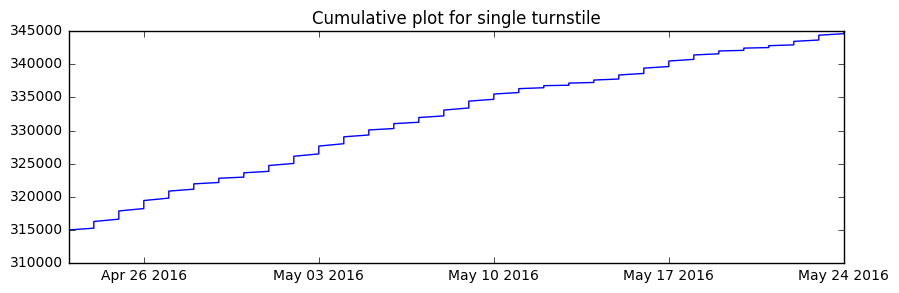

In [42]:
import datetime as dt
mask = ((turnstile_df_clean["C/A"] == "R236") & (turnstile_df_clean["UNIT"] == "R045") & (turnstile_df_clean["SCP"] == "00-00-00") & (turnstile_df_clean["STATION"] == "GRD CNTRL-42 ST"))
plt.figure(figsize=(10,3))
plt.title("Cumulative plot for single turnstile")
plt.plot(pd.to_datetime(turnstile_df_clean[mask].DATE), (pd.rolling_mean(turnstile_df_clean[mask].ENTRIES, 14)))

**Challenge 5**

**So far we've been operating on a single turnstile level, let's combine turnstiles in the same ControlArea/Unit/Station combo. There are some ControlArea/Unit/Station groups that have a single turnstile, but most have multiple turnstilea-- same value for the C/A, UNIT and STATION columns, different values for the SCP column.
We want to combine the numbers together -- for each ControlArea/UNIT/STATION combo, for each day, add the counts from each turnstile belonging to that combo.**

In [51]:
turnstile_df_clean_SCP = turnstile_df_clean.groupby(["C/A","UNIT","STATION","DATE","SCP"])["DAILY_ENTRIES","DAILY_EXITS"].sum()

In [52]:
turnstile_df_clean_SCP.head()

DAILY_ENTRIES  DAILY_EXITS
C/A  UNIT STATION DATE       SCP                                 
A002 R051 59 ST   04/23/2016 02-00-00          956.0        330.0
                             02-00-01          768.0        243.0
                             02-03-00          387.0       1719.0
                             02-03-01          972.0       1869.0
                             02-03-02          985.0       1367.0

**Challenge 6**

**Similarly, combine everything in each station, and come up with a time series of [(date1, count1),(date2,count2),...] type of time series for each STATION, by adding up all the turnstiles in a station.**

In [58]:
turnstile_df_clean_STATION = turnstile_df_clean.groupby(['C/A','UNIT','STATION','DATE'],as_index = False)["DAILY_ENTRIES", "DAILY_EXITS"].sum()
turnstile_df_clean_STATION.head()

,C/A,UNIT,STATION,DATE,DAILY_ENTRIES,DAILY_EXITS
0,A002,R051,59 ST,04/23/2016,10394.0,6735.0
1,A002,R051,59 ST,04/24/2016,8570.0,5462.0
2,A002,R051,59 ST,04/25/2016,16618.0,10328.0
3,A002,R051,59 ST,04/26/2016,16889.0,10825.0
4,A002,R051,59 ST,04/27/2016,17277.0,10619.0


**Challenge 7**

**Plot the time series for a station.**

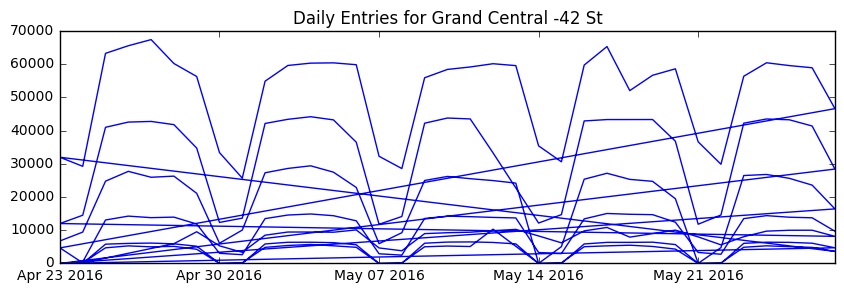

In [64]:
mask = (turnstile_df_clean_STATION["STATION"] == "GRD CNTRL-42 ST")
plt.figure(figsize=(10,3))
plt.title("Daily Entries for Grand Central -42 St")
plt.plot(pd.to_datetime(turnstile_df_clean_STATION[mask].DATE), turnstile_df_clean_STATION[mask].DAILY_ENTRIES)

**Challenge 8**

**Make one list of counts for one week for one station. Monday's count, Tuesday's count, etc. so it's a list of 7 counts. Make the same list for another week, and another week, and another week. plt.plot(week_count_list) for every week_count_list you created this way. You should get a rainbow plot of weekly commute numbers on top of each other.**

In [74]:
mask = (turnstile_df_clean["STATION"] == "GRD CNTRL-42 ST")
test1 = turnstile_df_clean[mask].groupby(['STATION','WEEKDAY_INDEX', 'DATE'])[['DAILY_ENTRIES']].sum().reset_index().sort_values('DAILY_ENTRIES', ascending = False)
test1
#plt.plot(test1.WEEKDAY_INDEX, test1.DAILY_ENTRIES)

,STATION,WEEKDAY_INDEX,DATE,DAILY_ENTRIES
8,GRD CNTRL-42 ST,1,05/17/2016,173295.0
11,GRD CNTRL-42 ST,2,05/04/2016,170326.0
6,GRD CNTRL-42 ST,1,05/03/2016,167417.0
9,GRD CNTRL-42 ST,1,05/24/2016,166522.0
16,GRD CNTRL-42 ST,3,05/05/2016,166432.0
14,GRD CNTRL-42 ST,2,05/25/2016,163756.0
7,GRD CNTRL-42 ST,1,05/10/2016,163534.0
12,GRD CNTRL-42 ST,2,05/11/2016,163242.0
3,GRD CNTRL-42 ST,0,05/16/2016,162103.0
5,GRD CNTRL-42 ST,1,04/26/2016,161398.0


**Challenge 9**

**Over multiple weeks, sum total ridership for each station and sort them, so you can find out the stations with the highest traffic during the time you investigate**

In [75]:
daily_ent = turnstile_df_clean.groupby(['UNIQUE_STATION'])[['DAILY_ENTRIES']].sum().reset_index().sort_values('DAILY_ENTRIES', ascending = False)
daily_ent1 = daily_ent[0:19]

In [76]:
daily_ent.head()

,UNIQUE_STATION,DAILY_ENTRIES
298,GRD CNTRL-42 ST-4567S,4486280.0
86,34 ST-HERALD SQ-BDFMNQR,3838540.0
420,TIMES SQ-42 ST-1237ACENQRS,2745283.0
89,34 ST-PENN STA-ACE,2484717.0
28,14 ST-UNION SQ-LNQR456,2319366.0


In [77]:
daily_ex = turnstile_df_clean.groupby(['UNIQUE_STATION'])[['DAILY_EXITS']].sum().reset_index().sort_values('DAILY_EXITS', ascending = False)
daily_ex1 = daily_ex[0:19]

In [78]:
daily_ex_ent = turnstile_df_clean.groupby(['UNIQUE_STATION'])[['DAILY_EXITS', 'DAILY_ENTRIES']].sum().reset_index().sort_values('DAILY_EXITS', ascending = False)
daily_ex_ent1 = daily_ex_ent[0:19]

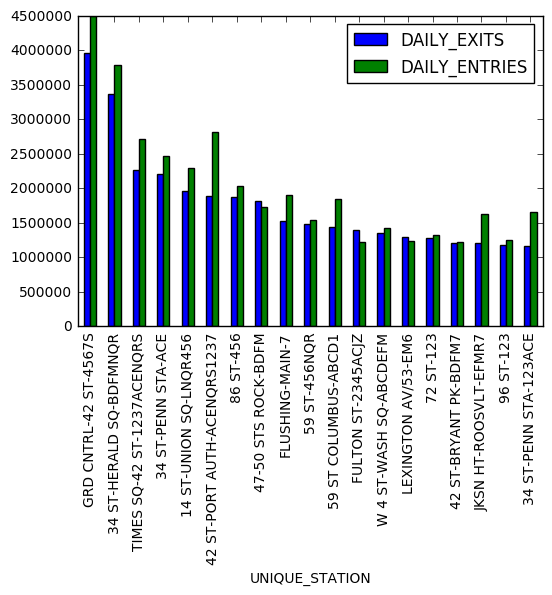

In [67]:
daily_ex_ent1.plot(x = 'UNIQUE_STATION', y = ['DAILY_EXITS','DAILY_ENTRIES'], kind = 'bar')

**Challenge 10**

**Make a single list of these total ridership values and plot it with
plt.hist(total_ridership_counts)
to get an idea about the distribution of total ridership among different stations.
This should show you that most stations have a small traffic, and the histogram bins for large traffic volumes have small bars.**



In [87]:
daily_ex_ent["TOTAL_RIDERSHIP"] = daily_ex_ent["DAILY_ENTRIES"] + daily_ex_ent["DAILY_EXITS"]

(array([ 349.,   66.,   15.,    6.,    4.,    3.,    0.,    0.,    1.,    1.]),
 array([  1.20000000e+01,   8.45622000e+05,   1.69123200e+06,
          2.53684200e+06,   3.38245200e+06,   4.22806200e+06,
          5.07367200e+06,   5.91928200e+06,   6.76489200e+06,
          7.61050200e+06,   8.45611200e+06]),
 <a list of 10 Patch objects>)

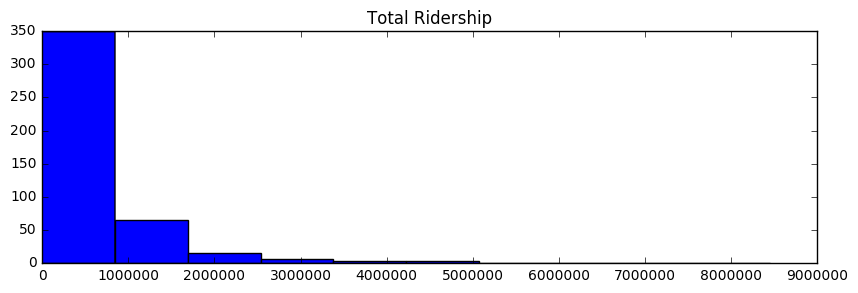

In [102]:

plt.figure(figsize=(10,3))
plt.title("Total Ridership")
plt.hist(daily_ex_ent.TOTAL_RIDERSHIP)